## Modulação por Amplitude com Banda Lateral Dupla

<!---
<center> <h2 style="background-color:DarkKhaki; color:white" >Carregando o Conjunto de Dados Íris</h2></center>

<center> <h3 style="background-color:#ECF7AE; color:#3F403D" >Colocando os dados no formato aceito pelo Spark</h3></center>
-->

## O que é Modulação?

###  Definição:

Modulação é o processo de alterar as características de um sinal de onda, chamado de portadora, de maneira sistemática com base em outro sinal denominado modulante ou mensagem. É um método utilizado na comunicação para permitir que informações sejam transmitidas através de uma onda portadora, como sinais de rádio e televisão, voz em telefonia e dados em redes de computadores. Através da modulação, a informação a ser transmitida é incorporada à portadora, tornando-se possível enviar sinais através de grandes distâncias com o mínimo de perda de qualidade.

Vantagens da modulação:
1. Maior frequência;
2. Maiores distâncias;
3. Uso de Menores antenas (dimensões variáveis);
4. Facilidade da irradiação/transmissão;
5. Transmissão simultânea de múltiplos sinais – multiplexação.


<center>
<img src="utils/am.gif" alt="Modulação por Amplitude" style="width:600px;">
<p>Modulação por Amplitude</p>
</center>

## Simulação com Python usando NumPy, Matplotlib e SciPy

In [24]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("ggplot")
%config InlineBackend.figure_format = "svg"

### Sinal Modulante (informação):

é o sinal que possui a informação a ser transmitida.

Os sistemas de telecomunicação tem por finalidade transmitir sinais de imagem e áudio, olhando para o sinal de áudio, o ouvido humano consegue captar e escultar
frequências na faixa de $20Hz$ a $20KHz$, porém para transmitir sinais nessa frequência seria inviável, pois o tamanho da antena seria extremamente grande, como mostra o cálculo abaixo:

Para encontrar o tamanho de uma antena para a frequência de $20KHz$ é preciso obter o comprimento de onda do sinal, para isso, temos:


$$
\begin{align}
    \lambda = \dfrac{c}{f} = \dfrac{3\times10^8m/s}{20\times10^3Hz}  \tag{1}\\
\lambda = 15000m  \tag{2}\\
\end{align}
$$


Onde:

+ c : Velocidade da luz no vácuo;
+ f : Frequência do sinal a ser transmitido;


A partir do comprimento de onda obtido é possível calcular o comprimento da antena, considerando uma antena de $1/4$ do comprimento de onda, temos:

$$
\begin{align}
    C_{antena} = \dfrac{\lambda}{4} = \dfrac{15000}{4}  =  3750m \quad ou \quad 3,75 Km \tag{3}
\end{align}
$$

Dessa forma, se torna inviável a construção de uma antena dessa dimensão, no entanto, é possível transmitir esse sinal usando a modulação por amplitude, para isso, usa-se um sinal de portadora em alta frequência, esse sinal é modificado ao multiplicar o sinal modulante, dessa forma, se obtem o sinal modulado por amplitude.

<br>

**Sinal Modulante Exemplo**:

$$
    s(t) = A_{m1} \cdot cos(w_{c1}t) + A_{m2} \cdot cos(w_{c2}t)\\\\
    s_m(t) = 10^{-2} \cdot cos(10^{3}t) + 10^{-3} \cdot cos(10^{4}t)
$$

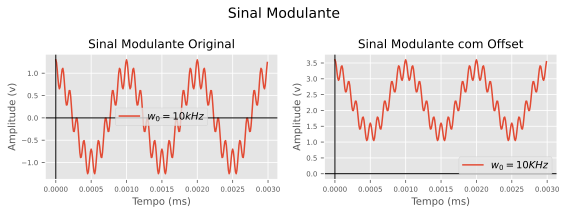

In [25]:
# Amplitde | Frequência do sinal modulante
Asn = [100e-2, 300e-3]; wm = [1e3, 1e4]

# sampling rate
sr = 1e5
# sampling interval
ts = 1.0/sr
tm = np.arange(0, 3e-3, ts)

# Sinal Modulante, exemplo
fc_sm = lambda Asn, wm, tm:Asn * np.cos(2*np.pi*wm*tm)
sm = fc_sm(Asn[0], wm[0], tm) + fc_sm(Asn[1], wm[1], tm)
offset = max(sm) + 100e-2

plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle("Sinal Modulante", fontsize=14)

# Plotando o sinal original
ax1.plot(tm, sm, label="$w_0 = 10 kHz$")
ax1.set_title("Sinal Modulante Original", fontsize=12)
ax1.set_xlabel("Tempo (ms)", fontsize=10)
ax1.set_ylabel("Amplitude (v)", fontsize=10)
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")
ax1.legend()

# plotando o sinal com offset
sm_offset = sm + offset
ax2.plot(tm, sm_offset, label="$w_0 = 10 KHz$")
ax2.set_title("Sinal Modulante com Offset", fontsize=12)
ax2.set_xlabel("Tempo (ms)", fontsize=10)
ax2.set_ylabel("Amplitude (v)", fontsize=10)
ax2.axhline(0, linewidth=1., color="black")
ax2.axvline(0, linewidth=1., color="black")
ax2.legend()

plt.tight_layout()
plt.show()


### Análise do Espectro de Frequência do Sinal modulante.

A biblioteca SciPy possui um módulo que implementa a Transformada rápida de Fourier (Fast Fourier Transform - FFT) e sua inversa.

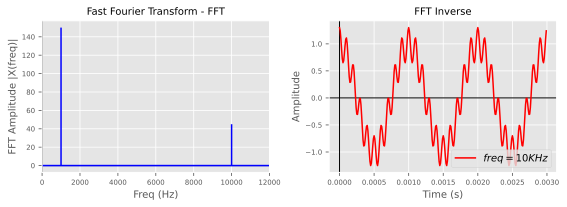

In [26]:
from scipy.fftpack import fft, ifft

X = fft(sm)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

def fft_ifft_grafico(t, X, x_inf=0, x_lim=12000, label=" ", cor="r"):
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    
    ax1.axhline(0, linewidth=1., color="black")
    ax1.axvline(0, linewidth=1., color="black")
    ax2.axhline(0, linewidth=1., color="black")
    ax2.axvline(0, linewidth=1., color="black")

    plt.rc('xtick', labelsize=7)
    plt.rc('ytick', labelsize=7)

    ax1.stem(freq, np.abs(X), 'b', \
            markerfmt=" ", basefmt="-b")
    ax1.set_title("Fast Fourier Transform - FFT", fontsize=10)
    ax1.set_xlabel("Freq (Hz)", fontsize=10)
    ax1.set_ylabel("FFT Amplitude |X(freq)|", fontsize=10)
    ax1.set_xlim(x_inf, x_lim)


    ax2.plot(t, np.real(ifft(X)), color=cor, label=label)
    ax2.set_title("FFT Inverse", fontsize=10)
    ax2.set_xlabel('Time (s)', fontsize=10)
    ax2.set_ylabel('Amplitude', fontsize=10)
    ax2.legend()

    plt.tight_layout()
    plt.show()

fft_ifft_grafico(t=tm, X=X, x_lim=12000, label="$freq = 10 KHz$")

O primeiro gráfico mostra o espectro de frequência do sinal, encontrado a partir da Transformada de Fourier Rápida (Fast Fourier Transform FFT). o primeiro pico tem como frequência $1KHz$ e o segundo $10KHz$ esse valores são os mesmo das frequências das senoides que compõem o sinal exemplo.

Já o segundo gráfico mostra a Transformada Rápida de Fourier Inversa, tendo como resultado o sinal no novamente no domínio do tempo.

### Sinal da Portadora (Transporta a informação):

Sinal que transporta a informação através do canal, por ser um sinal transmitido por antenas é preciso que seja de alta frequência, para que o comprimento da antena seja reduzido, sinais senoidais são usados como portadora por ser simples e possuir as características necessárias para realizar a modulação por amplitude.

<br>

**Sinal de Portadora Exemplo**:

$$
    s_p(t) = A_{p} \cdot sen(w_{p1}t)\\\\
    s_p(t) = 5 \cdot sen(8^{6}t)
$$

In [27]:
# Função para plotar o gráfico da portadora e do sinal modulado
def plot_grafico(t, y, titulo, xlabel, ylabel, cor, label=False):
    plt.rc('xtick', labelsize=7)
    plt.rc('ytick', labelsize=7)

    fig, ax = plt.subplots(figsize=(8, 3))

    # Plotando o sinal 
    ax.plot(t, y, color=cor, label=label)
    ax.set_title(titulo, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.axhline(0, linewidth=1., color="black")
    ax.axvline(0, linewidth=1., color="black")
    if label:
        ax.legend()

    plt.show()

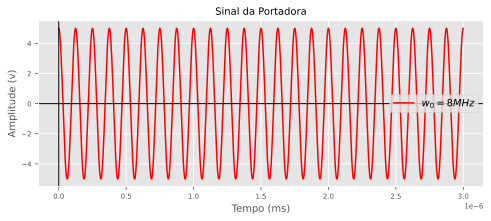

In [28]:
# Amplitde | Frequência do sinal da Portadora
Ap = 5; wp = 8e6
# sampling rate
sr = 1e9
# sampling interval
ts = 1.0/sr
tp = np.arange(0, 3e-6, ts)
# Sinal Modulante, exemplo
fc_sp = lambda Ap, wp, tp: Ap * np.cos(2*np.pi*wp*tp)
sp = fc_sp(Ap, wp, tp)

plot_grafico(tp, sp, "Sinal da Portadora",
             "Tempo (ms)", "Amplitude (v)", cor="r", label="$w_0 = 8 MHz$")

### Análise do Espectro de Frequência do Sinal da portadora.

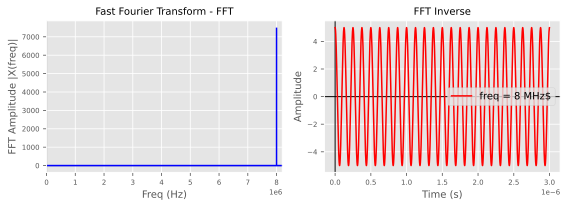

In [29]:
X = fft(sp)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T


fft_ifft_grafico(t=tp, X=X, x_lim=82e5, label="freq = 8 MHz$")

### Sinal Modulado:

é o sinal modulante multiplicado pelo sinal da portadora.

**Exemplo**:

$$
    s_{modulado}(t) = [A_{m1} \cdot cos(w_{c1}t) + A_{m2} \cdot cos(w_{c2}t)] \cdot [A_{p} \cdot sen(w_{p1}t)] \\
    s_{modulado}(t) = [10^{-2} \cdot cos(10^{3}t) + 10^{-3} \cdot cos(10^{4}t)] \cdot [5 \cdot sen(8^{6}t)]
$$



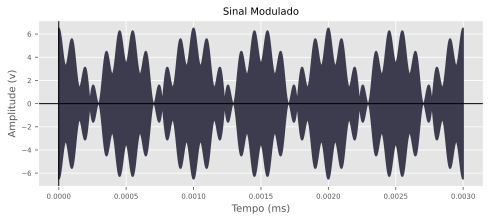

In [30]:
# sampling rate
sr = 1e9
# sampling interval
ts = 1.0/sr
ts_modulado = np.arange(0, 3e-3, ts)

# Sinal Modulado, convolução do
# sinal modulante e sinal da portadora.
sm = fc_sm(Asn[0], wm[0], ts_modulado) + fc_sm(Asn[1], wm[1], ts_modulado)
sp = fc_sp(Ap, wp, ts_modulado)
s_modulado = sm * sp


plot_grafico(ts_modulado, s_modulado, "Sinal Modulado",
             "Tempo (ms)", "Amplitude (v)", cor="#3D3C4E")


Envoltória do sinal. Contém o sinal a ser transmitido.


### Análise do Espectro de Frequência do Sinal modulado.


In [31]:
X = fft(s_modulado[:int(len(ts_modulado)/100)])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

fig2, ax1 = plt.subplots(figsize=(8, 3))
    
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

ax1.stem(freq, np.abs(X), 'b',
         markerfmt=" ", basefmt="-b")
ax1.set_title("Fast Fourier Transform - FFT", fontsize=10)
ax1.set_xlabel("Freq (Hz)", fontsize=10)
ax1.set_ylabel("FFT Amplitude |X(freq)|", fontsize=10)
ax1.set_xlim(0, 82e5)

plt.show()


# Conclusão

A técnica de modulação por amplitude (AM) é uma das técnicas mais antigas e básicas usadas em sistemas de comunicação de rádio. A modulação por amplitude é baseada no princípio de que o sinal de informação é combinado com um sinal portador de alta frequência para produzir um sinal modulado, que pode ser transmitido por um canal de comunicação. Quando recebido, o sinal é demodulado para extrair a informação original.

Embora a modulação por amplitude seja uma técnica simples, ela ainda tem muitos usos práticos. Entre os usos mais comuns estão a transmissão de programação de rádio e televisão, bem como a comunicação de voz em telefonia fixa e celular. A técnica AM também é amplamente usada em aplicativos industriais, como controle de processos e automação de fábrica.

No entanto, apesar da simplicidade da técnica, a modulação por amplitude tem algumas limitações significativas, principalmente em relação à eficiência espectral. Uma grande quantidade de banda de frequência é necessária para a transmissão do sinal modulado, o que limita o número de canais que podem ser utilizados em uma área geográfica específica.

Apesar dessas limitações, a modulação por amplitude ainda é uma técnica importante e seu uso é evidente em muitas aplicações cotidianas. Hoje, muitos sistemas empregam a chamada "modulação por amplitude vestigial" (VSB), que permite um uso mais eficiente da largura de banda disponível.

Em resumo, embora a modulação por amplitude tenha sido superada por outras técnicas mais recentes em alguns aspectos, ela continua sendo um componente crítico e indispensável em muitas aplicações. Suas vantagens incluem a facilidade de implementação, a simplicidade de design e a adaptabilidade a tecnologias mais recentes.